### Gaussian Naive Bayes Classifier
- Assumes all features are conditionally independent
- Estimates mean and std

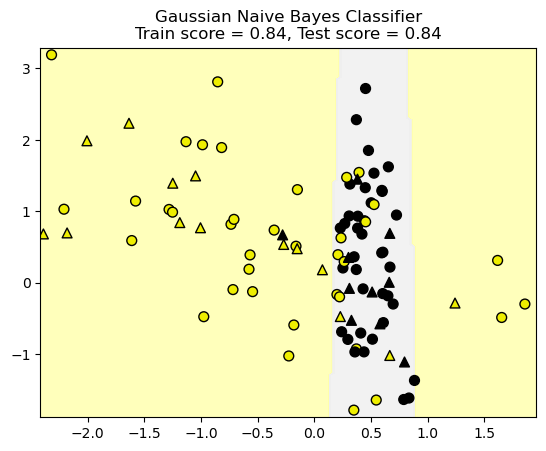

In [50]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

clf = GaussianNB()
clf.fit(X_train, y_train)

plot_class_regions_for_classifier(clf, X_train, y_train, X_test, y_test, "Gaussian Naive Bayes Classifier")

### Random Forests
- Builds decision trees in parallel with random variation in sampling and feature splits

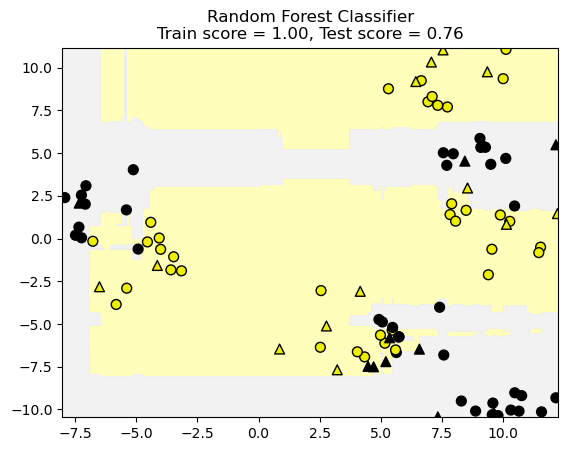

In [51]:
from sklearn.ensemble import RandomForestClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
import pandas as pd

from sklearn.datasets import make_blobs
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

clf = RandomForestClassifier(random_state = 0) 
# max_depth controls depth of each tree

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

plot_class_regions_for_classifier(clf, X_train, y_train, X_test, y_test, "Random Forest Classifier")

### Gradient Boosted Trees
- Builds series of trees that make fewer and fewer mistakes

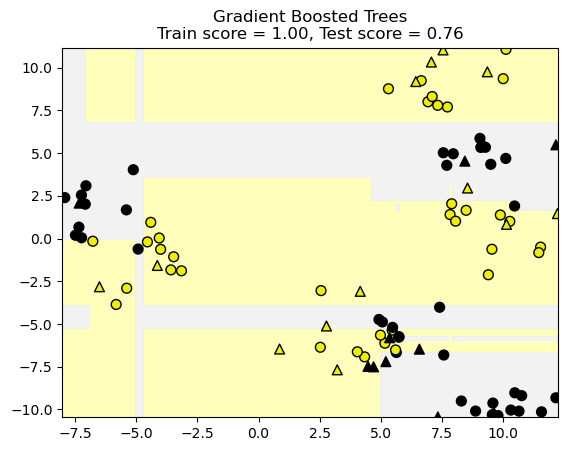

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state = 0) 
clf.fit(X_train, y_train)

plot_class_regions_for_classifier(clf, X_train, y_train, X_test, y_test, "Gradient Boosted Trees")

### Neural Networks

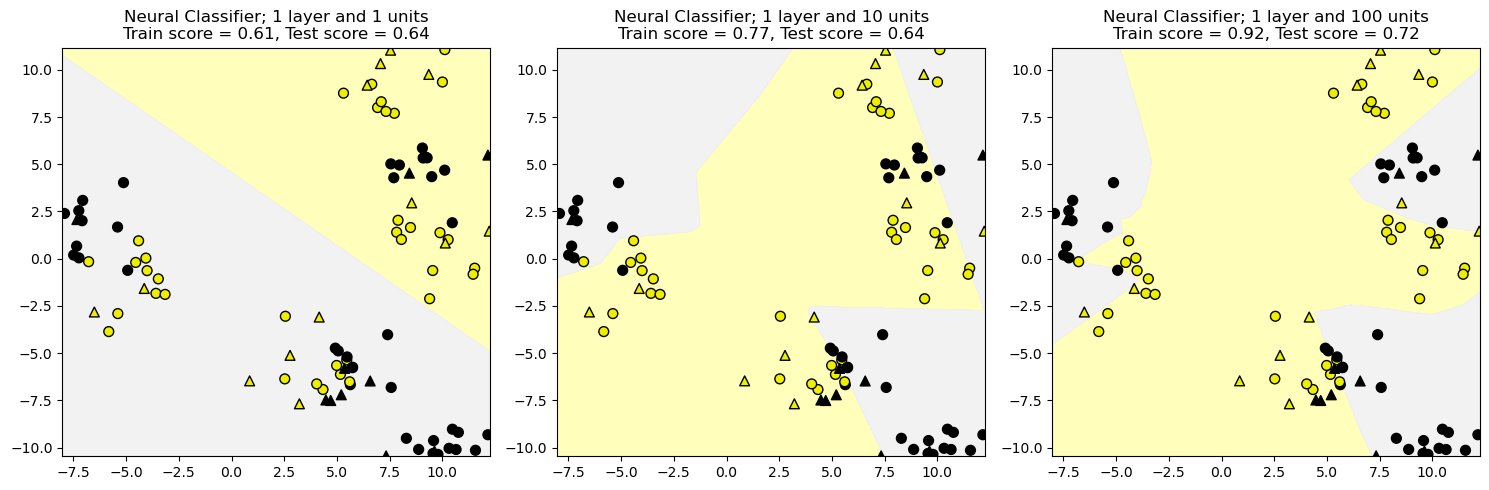

In [77]:
from sklearn.neural_network import MLPClassifier

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

for units, axs in zip([1, 10, 100], axs):
    
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs', random_state = 0)
    nnclf.fit(X_train, y_train)

    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                         X_test, y_test, "Neural Classifier; 1 layer and {} units".format(units), axs)
    plt.tight_layout()

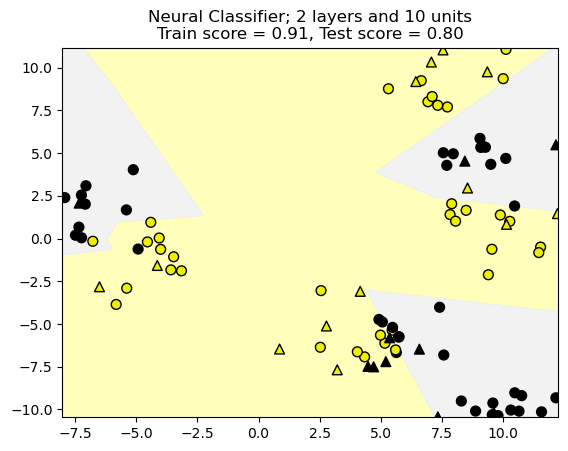

<Figure size 640x480 with 0 Axes>

In [80]:
nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver = 'lbfgs', random_state = 0)
nnclf.fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test, "Neural Classifier; 2 layers and 10 units")
plt.tight_layout()

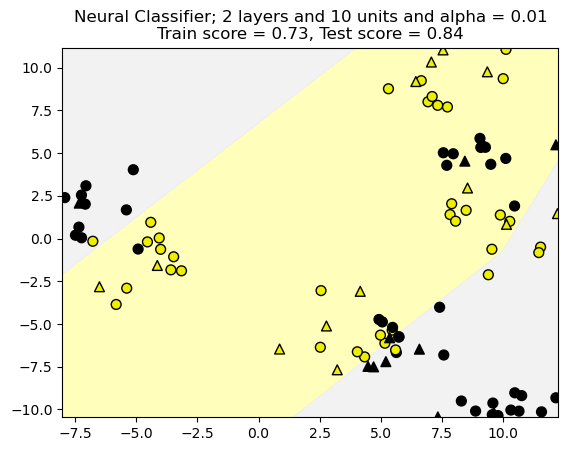

<Figure size 640x480 with 0 Axes>

In [87]:
# Too high alpha can underfit
nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver = 'lbfgs', alpha = 10, random_state = 0)
nnclf.fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test, "Neural Classifier; 2 layers and 10 units and alpha = 0.01")
plt.tight_layout()